In [1]:
import requests
from bs4 import BeautifulSoup

page = requests.get('https://en.wikipedia.org/wiki/List_of_largest_companies_in_India')
soup = BeautifulSoup(page.text,'html')

In [2]:
# finding the table with required data
table = soup.find_all('table')[1]
print(table)

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue<br/><small>(in  <b>₹ Crore</b>)</small>
</th>
<th>Revenue growth
</th>
<th>Profits<br/><small>(in  <b>₹ Crore</b>)</small>
</th>
<th>Headquarters
</th>
<th><a href="/wiki/List_of_public_sector_undertakings_in_India" title="List of public sector undertakings in India">State Controlled</a>
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Indian_Oil_Corporation" title="Indian Oil Corporation">Indian Oil Corporation</a>
</td>
<td><a href="/wiki/Petroleum_industry" title="Petroleum industry">Oil and gas</a>
</td>
<td style="text-align:center;">424,321
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/comm

In [3]:
# Finding Table headers
titles = table.find_all('th')
titles_text = [titles.text.strip() for titles in titles]
titles_text

['Rank',
 'Name',
 'Industry',
 'Revenue(in  ₹ Crore)',
 'Revenue growth',
 'Profits(in  ₹ Crore)',
 'Headquarters',
 'State Controlled']

In [4]:
import pandas as pd
df = pd.DataFrame(columns=titles_text)
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,State Controlled


In [5]:
# Putting data into a dataframe
rows= table.find_all('tr')
for row in rows[1:]:
    table_data = row.find_all('td')
    row_data = [data.text.strip() for data in table_data]
    print(row_data)
    length = len(df)
    df.loc[length] = row_data
df.head(8)

['1', 'Indian Oil Corporation', 'Oil and gas', '424,321', '13.2%', '22,189', 'New Delhi', 'Yes']
['2', 'Reliance Industries Limited', 'Oil and gas', '410,295', '28.2%', '36,075', 'Mumbai', '']
['3', 'Oil and Natural Gas Corporation', 'Oil and gas', '333,143', '11.0%', '22,106', 'New Delhi', 'Yes']
['4', 'State Bank of India', 'Banking', '306,528', '2.6%', '−4,556', 'Mumbai', 'Yes']
['5', 'Tata Motors', 'Automotive', '301,175', '7.9%', '8,989', 'Mumbai', '']
['6', 'Bharat Petroleum', 'Oil and gas', '238,638', '13.7%', '9,009', 'Mumbai', 'Yes']
['7', 'Hindustan Petroleum', 'Oil and gas', '221,693', '13.4%', '7,218', 'Mumbai', 'Yes']
['8', 'Rajesh Exports', 'Gems and jewellery', '187,748', '22.5%', '1,266', 'Bangalore', '']
['9', 'Tata Steel', 'Iron and steel', '147,192', '25.3%', '13,434', 'Mumbai', '']
['10', 'Coal India', 'Metals and mining', '132,897', '5.3%', '7,020', 'Kolkata', 'Yes']
['11', 'Tata Consultancy Services', 'Infotech', '126,745', '3.6%', '25,826', 'Mumbai', '']
['12', '

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"306,528",2.6%,"−4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"301,175",7.9%,"8,989",Mumbai,
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7%,"9,009",Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,"221,693",13.4%,"7,218",Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,"187,748",22.5%,"1,266",Bangalore,


In [6]:
# Dropping non required columns
df.drop('State Controlled',axis = 1,inplace=True)
df.head(6)

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi
3,4,State Bank of India,Banking,"306,528",2.6%,"−4,556",Mumbai
4,5,Tata Motors,Automotive,"301,175",7.9%,"8,989",Mumbai
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7%,"9,009",Mumbai


In [7]:
def profit(pr):
    if(pr<0):
        return 'Loss'
    elif(pr==0):
        return 'Neutral'
    else:
        return 'Profit'

def Percentclean(data):
    return float(data.replace('%',''))

def Commaclean(data):
    return float(data.replace(',',""))

def ProfitClean(data):
    data = data.replace(',',"")
    data = data.replace("−", "-")
    return int(data.strip())
    
# PArsing data into a reaable string for plotting
df['Revenue_Clean'] = df['Revenue(in  ₹ Crore)'].apply(Commaclean)
df['Revenue_Growth_Clean'] = df['Revenue growth'].apply(Percentclean) 
df['Profit_Clean'] = df['Profits(in  ₹ Crore)'].apply(ProfitClean)
df['Profit_Status'] = df['Profit_Clean'].apply(profit)
df.head()


,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,Revenue_Clean,Revenue_Growth_Clean,Profit_Clean,Profit_Status
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,424321.0,13.2,22189,Profit
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,410295.0,28.2,36075,Profit
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,333143.0,11.0,22106,Profit
3,4,State Bank of India,Banking,"306,528",2.6%,"−4,556",Mumbai,306528.0,2.6,-4556,Loss
4,5,Tata Motors,Automotive,"301,175",7.9%,"8,989",Mumbai,301175.0,7.9,8989,Profit


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Locations Of Headqarter by Industry

C:\Users\New\AppData\Local\Temp\ipykernel_5256\9691037.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


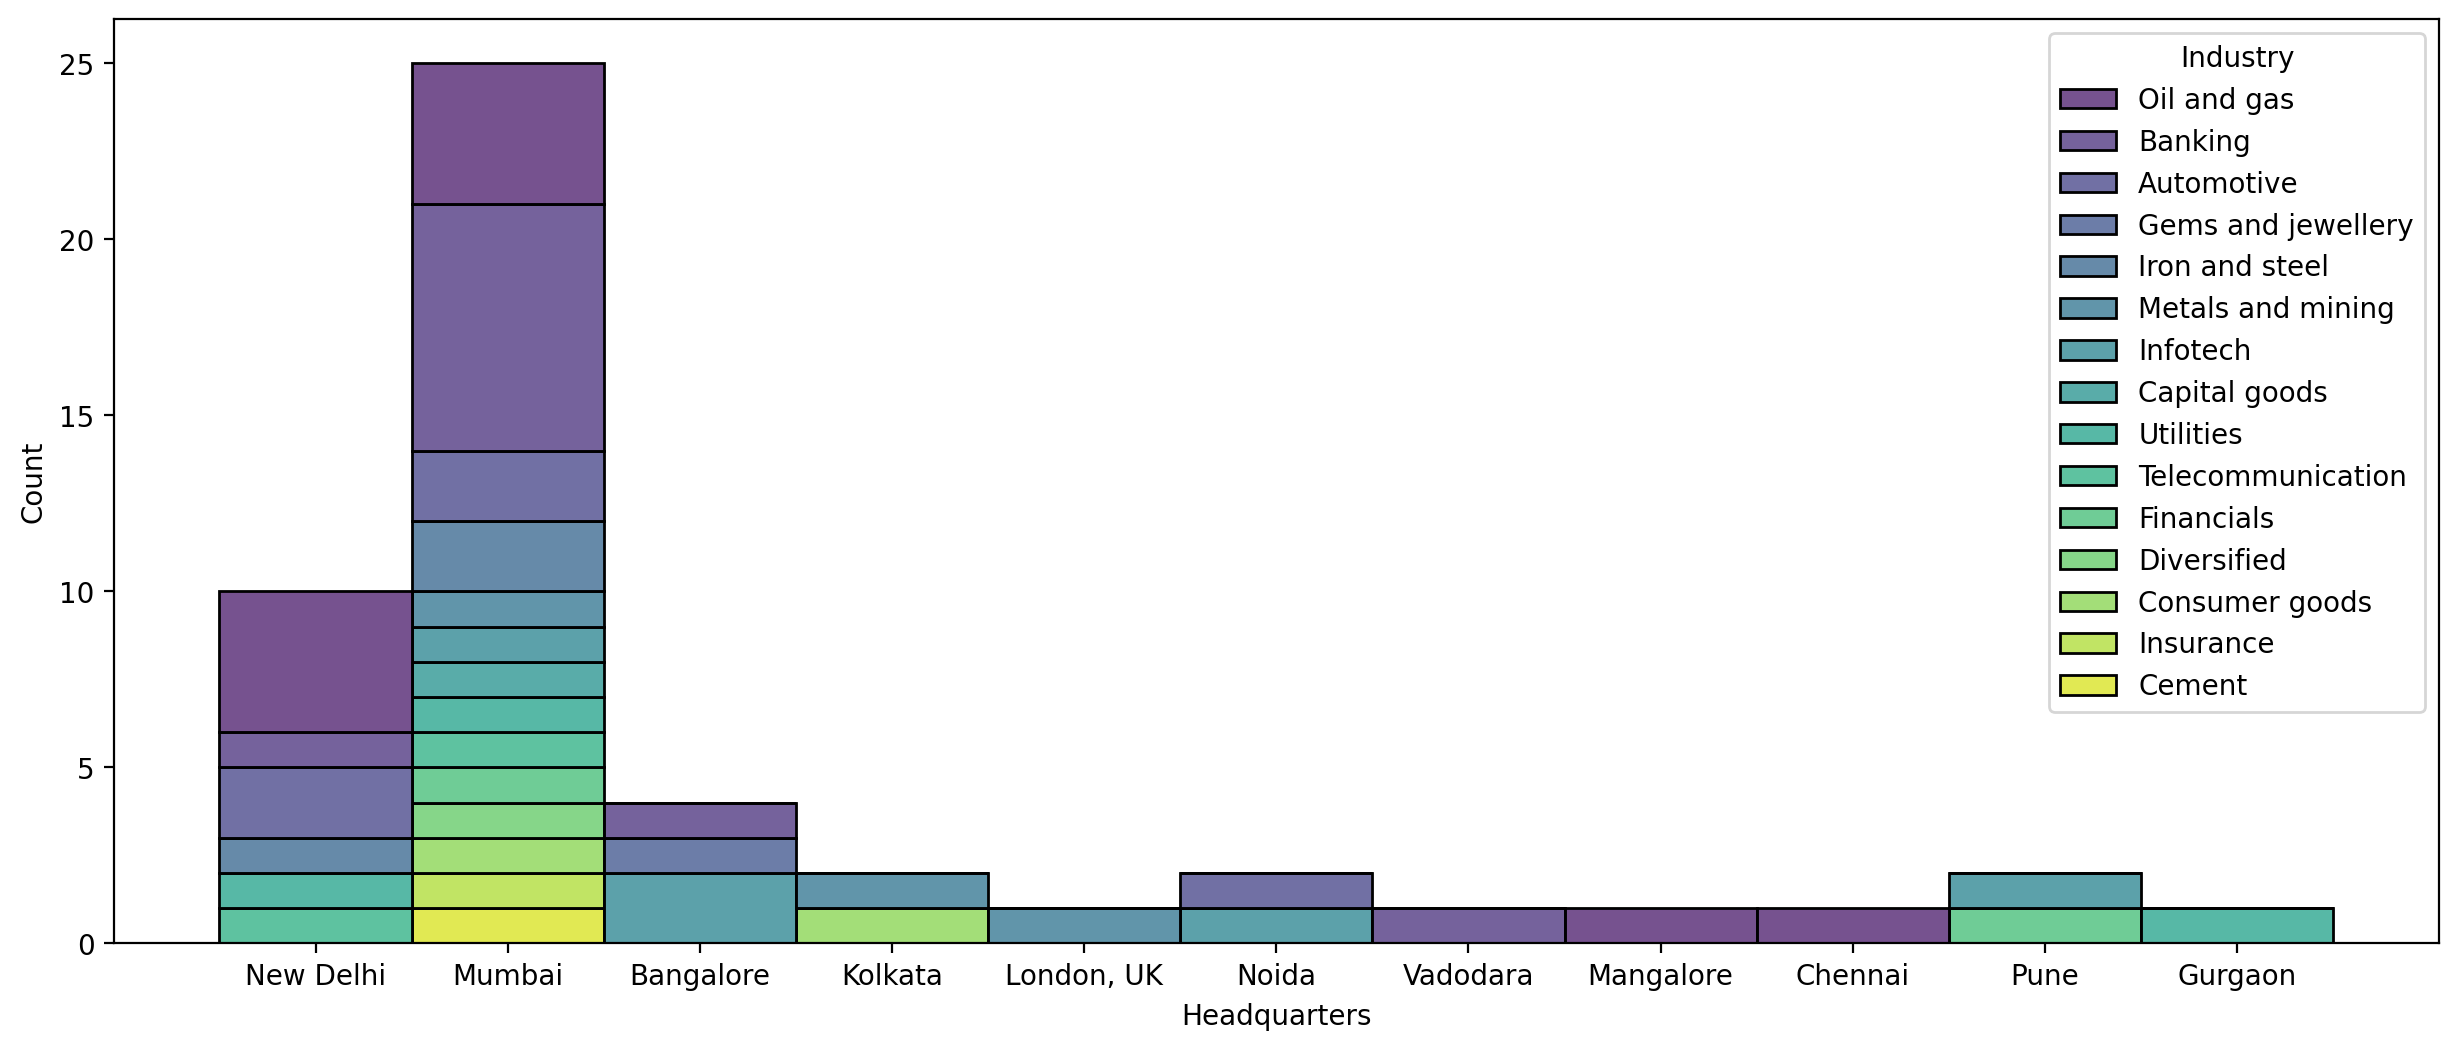

In [9]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
fig ,ax = plt.subplots(figsize=(15,6),dpi = 200)

sns.histplot(x='Headquarters',data = df,hue = 'Industry',palette='viridis',multiple="stack")
move_legend(ax, "upper right")

Relation Between Revenue And Profit

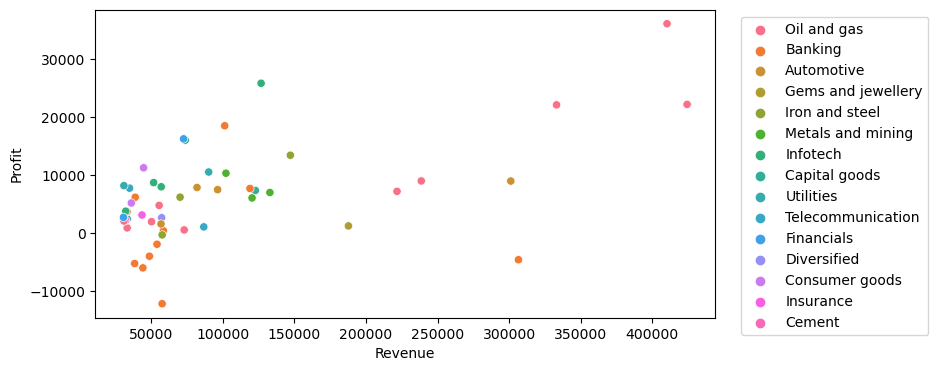

In [10]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = df ,x = 'Revenue_Clean',y = 'Profit_Clean',hue = 'Industry',)
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.03,1))

Top 10 Companies By Revenue

In [11]:
df.sort_values('Revenue_Clean',ascending=False)[0:10]


,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,Revenue_Clean,Revenue_Growth_Clean,Profit_Clean,Profit_Status
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,424321.0,13.2,22189,Profit
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,410295.0,28.2,36075,Profit
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,333143.0,11.0,22106,Profit
3,4,State Bank of India,Banking,"306,528",2.6%,"−4,556",Mumbai,306528.0,2.6,-4556,Loss
4,5,Tata Motors,Automotive,"301,175",7.9%,"8,989",Mumbai,301175.0,7.9,8989,Profit
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7%,"9,009",Mumbai,238638.0,13.7,9009,Profit
6,7,Hindustan Petroleum,Oil and gas,"221,693",13.4%,"7,218",Mumbai,221693.0,13.4,7218,Profit
7,8,Rajesh Exports,Gems and jewellery,"187,748",22.5%,"1,266",Bangalore,187748.0,22.5,1266,Profit
8,9,Tata Steel,Iron and steel,"147,192",25.3%,"13,434",Mumbai,147192.0,25.3,13434,Profit
9,10,Coal India,Metals and mining,"132,897",5.3%,"7,020",Kolkata,132897.0,5.3,7020,Profit


Count Of Companies Under Profit Or Loss

<Axes: xlabel='Profit_Status', ylabel='count'>

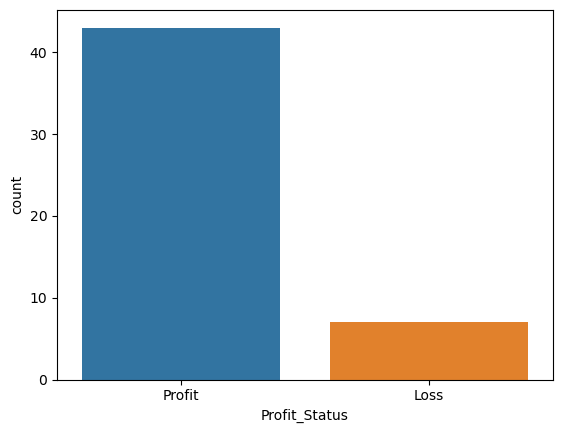

In [12]:
sns.countplot(data = df,x = 'Profit_Status')

Top 10 Companies By Profit

In [13]:
df.sort_values('Profit_Clean',ascending=False)[0:10]

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,Revenue_Clean,Revenue_Growth_Clean,Profit_Clean,Profit_Status
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,410295.0,28.2,36075,Profit
10,11,Tata Consultancy Services,Infotech,"126,745",3.6%,"25,826",Mumbai,126745.0,3.6,25826,Profit
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,424321.0,13.2,22189,Profit
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,333143.0,11.0,22106,Profit
15,16,HDFC Bank,Banking,"101,344",17.6%,"18,510",Mumbai,101344.0,17.6,18510,Profit
22,23,HDFC,Financials,"72,596",18.9%,"16,255",Mumbai,72596.0,18.9,16255,Profit
20,21,Infosys,Infotech,"73,762",3.1%,"16,029",Bangalore,73762.0,3.1,16029,Profit
8,9,Tata Steel,Iron and steel,"147,192",25.3%,"13,434",Mumbai,147192.0,25.3,13434,Profit
35,36,ITC Limited,Consumer goods,"44,674",1.6%,"11,271",Kolkata,44674.0,1.6,11271,Profit
17,18,NTPC Limited,Utilities,"90,144",7.7%,"10,544",New Delhi,90144.0,7.7,10544,Profit


List Of Unicorn Companies In India

In [14]:
Unicorn = df[df['Profit_Clean']>10000]
Unicorn = Unicorn.sort_values('Profit_Clean',ascending=False)
Unicorn

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,Revenue_Clean,Revenue_Growth_Clean,Profit_Clean,Profit_Status
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,410295.0,28.2,36075,Profit
10,11,Tata Consultancy Services,Infotech,"126,745",3.6%,"25,826",Mumbai,126745.0,3.6,25826,Profit
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,424321.0,13.2,22189,Profit
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,333143.0,11.0,22106,Profit
15,16,HDFC Bank,Banking,"101,344",17.6%,"18,510",Mumbai,101344.0,17.6,18510,Profit
22,23,HDFC,Financials,"72,596",18.9%,"16,255",Mumbai,72596.0,18.9,16255,Profit
20,21,Infosys,Infotech,"73,762",3.1%,"16,029",Bangalore,73762.0,3.1,16029,Profit
8,9,Tata Steel,Iron and steel,"147,192",25.3%,"13,434",Mumbai,147192.0,25.3,13434,Profit
35,36,ITC Limited,Consumer goods,"44,674",1.6%,"11,271",Kolkata,44674.0,1.6,11271,Profit
17,18,NTPC Limited,Utilities,"90,144",7.7%,"10,544",New Delhi,90144.0,7.7,10544,Profit


Count Of Unicorn Companies By Industry

<Axes: xlabel='Industry', ylabel='count'>

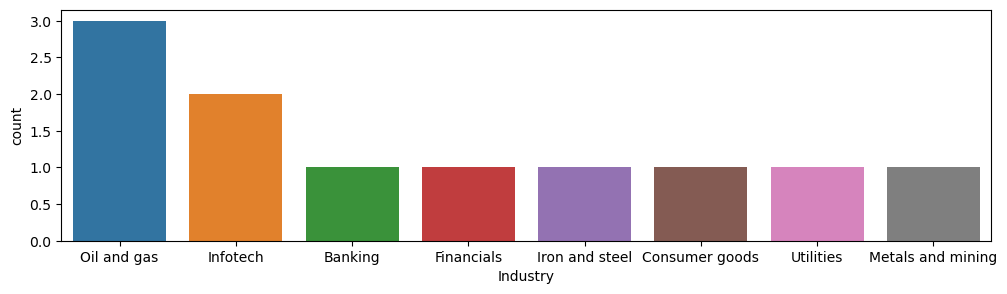

In [15]:
plt.figure(figsize=(12,3))
sns.countplot(data = Unicorn,x = 'Industry')

Industries By Growth Rate

Text(0.5, 1.0, 'Fastest Growing Industries')

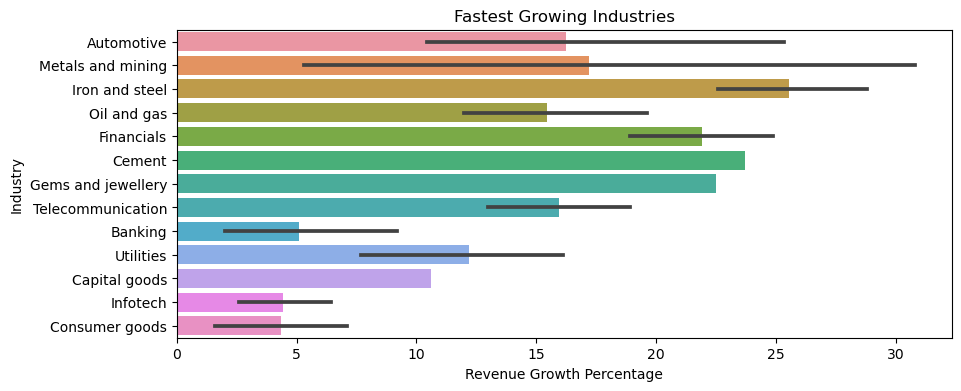

In [35]:
plt.figure(figsize=(10,4))
df1 = df.sort_values(by ='Revenue_Growth_Clean',ascending=False)
sns.barplot(data = df1[2:], y ='Industry',x='Revenue_Growth_Clean',estimator='mean')
plt.xlabel('Revenue Growth Percentage')
plt.title('Fastest Growing Industries')

#
## Conclusion

Following Things Were Observed In The Analysis:

1. Iron And Steel Industry is the most growing industry in India
2. Many companies prefer Mumbai for the location of their headquarters
3. Indian Oil Company Has the Highest Revenue Among Indian Companies
4. Reliance Industries Ltd. is the most profitable company in India